In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('data.csv')
df.head()

,Number,Year,Date of incident,Weekday of incident,Shift,Hospital department or location of incident,Age range of patient,"Type of injury incurred, if any",Presence of companion at time of incident,Location or environment in which the incident ocurred,Fall risk level,Reason for incident,Whether a fall prevention protocol was implemented,Involvement of medication associated with fall risk,Severity of incident,Sex
0,1,2012,02-01-2012 00:00,monday,Afternoon,diagnostic support,60<70,Bruising,No,Waiting room,Moderate,Loss of balance,No,No,adverse event,Female
1,2,2012,06-01-2012 00:00,friday,Night,inpatient units,40<50,cut,No,Room,Moderate,Trip,Yes,No,adverse event,Female
2,3,2012,10-01-2012 00:00,tuesday,Afternoon,emergency department,80<90,cut,Yes,Room,High,Trip,Yes,Yes,adverse event,Male
3,4,2012,14-01-2012 00:00,saturday,Night,inpatient units,70<80,no injury,No,Room,High,Mental confusion,Yes,No,adverse event,Male
4,5,2012,24-01-2012 00:00,tuesday,Night,inpatient units,70<80,no injury,Yes,Bathroom/shower,Moderate,Slip,Yes,No,adverse event,Female


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066 entries, 0 to 1065
Data columns (total 16 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   Number                                                 1066 non-null   int64 
 1   Year                                                   1066 non-null   int64 
 2   Date of incident                                       1066 non-null   object
 3   Weekday of incident                                    1066 non-null   object
 4   Shift                                                  1066 non-null   object
 5   Hospital department or location of incident            1066 non-null   object
 6   Age range of patient                                   1066 non-null   object
 7   Type of injury incurred, if any                        1066 non-null   object
 8   Presence of companion at time of incident              106

In [4]:
df.isnull().sum()

Number                                                   0
Year                                                     0
Date of incident                                         0
Weekday of incident                                      0
Shift                                                    0
Hospital department or location of incident              0
Age range of patient                                     0
Type of injury incurred, if any                          0
Presence of companion at time of incident                0
Location or environment in which the incident ocurred    0
Fall risk level                                          0
Reason for incident                                      0
Whether a fall prevention protocol was implemented       0
Involvement of medication associated with fall risk      0
Severity of incident                                     0
Sex                                                      0
dtype: int64

In [5]:
df.describe(include='O').T

,count,unique,top,freq
Date of incident,1066,829,02-08-2017,4
Weekday of incident,1066,7,tuesday,180
Shift,1066,3,Night,408
Hospital department or location of incident,1066,13,inpatient units,782
Age range of patient,1066,11,70<80,280
"Type of injury incurred, if any",1066,10,no injury,761
Presence of companion at time of incident,1066,2,Yes,676
Location or environment in which the incident ocurred,1066,16,Room,579
Fall risk level,1066,3,High,632
Reason for incident,1066,13,Loss of balance,323


In [6]:
df.drop(['Shift','Number','Date of incident','Year','Weekday of incident','Presence of companion at time of incident','Hospital department or location of incident','Whether a fall prevention protocol was implemented'],inplace=True,axis=1)

In [7]:
df.head()

,Age range of patient,"Type of injury incurred, if any",Location or environment in which the incident ocurred,Fall risk level,Reason for incident,Involvement of medication associated with fall risk,Severity of incident,Sex
0,60<70,Bruising,Waiting room,Moderate,Loss of balance,No,adverse event,Female
1,40<50,cut,Room,Moderate,Trip,No,adverse event,Female
2,80<90,cut,Room,High,Trip,Yes,adverse event,Male
3,70<80,no injury,Room,High,Mental confusion,No,adverse event,Male
4,70<80,no injury,Bathroom/shower,Moderate,Slip,No,adverse event,Female


In [8]:
columns= list(df.columns.values)
columns

['Age range of patient',
 'Type of injury incurred, if any',
 'Location or environment in which the incident ocurred',
 'Fall risk level',
 'Reason for incident',
 'Involvement of medication associated with fall risk',
 'Severity of incident',
 'Sex']

In [9]:
for i in columns:
    print(df[i].value_counts())


70<80    280
80<90    230
60<70    192
50<60     97
40<50     72
30<40     59
90<=      53
20<30     37
1<13      34
< 1        7
13<20      5
Name: Age range of patient, dtype: int64
no injury             761
excoriation           121
cut                    65
HEMATOMA               45
Bruising               26
EDEMA                  22
Fracture               19
Head trauma             5
Spinal cord injury      1
Wound dehiscence        1
Name: Type of injury incurred, if any, dtype: int64
Room                           579
Bathroom/shower                311
Exam room                       66
Hallway                         45
Waiting room                    26
Others                          15
Recovery room                    5
Medication room                  4
Outpatient adverse event         3
Surgical prep adverse event      3
Surgical table                   2
Medical office                   2
Operating room                   2
Triage adverse event             1
Vaccination ro

In [10]:
from sklearn.preprocessing import LabelEncoder
ordinal_cols=['Age range of patient','Fall risk level','Location or environment in which the incident ocurred','Type of injury incurred, if any',
              'Reason for incident','Involvement of medication associated with fall risk','Severity of incident',
              'Sex']

label_enc_dict={}

for col in ordinal_cols:
    label_enc_dict[col]=LabelEncoder()
    df[col]=label_enc_dict[col].fit_transform(df[col])


In [11]:
df.head()

,Age range of patient,"Type of injury incurred, if any",Location or environment in which the incident ocurred,Fall risk level,Reason for incident,Involvement of medication associated with fall risk,Severity of incident,Sex
0,6,0,15,2,4,0,1,0
1,4,7,10,2,12,0,1,0
2,8,7,10,0,12,1,1,1
3,7,9,10,0,5,0,1,1
4,7,9,0,2,10,0,1,0


In [12]:
X= df.drop(['Fall risk level'], axis=1)
X.head()

,Age range of patient,"Type of injury incurred, if any",Location or environment in which the incident ocurred,Reason for incident,Involvement of medication associated with fall risk,Severity of incident,Sex
0,6,0,15,4,0,1,0
1,4,7,10,12,0,1,0
2,8,7,10,12,1,1,1
3,7,9,10,5,0,1,1
4,7,9,0,10,0,1,0


In [13]:
Y= df['Fall risk level']
Y.head()

0    2
1    2
2    0
3    0
4    2
Name: Fall risk level, dtype: int32

In [14]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

print(Counter(Y))

Counter({0: 632, 2: 385, 1: 49})


In [15]:
# instantiating the random undersampler
ros = RandomOverSampler(sampling_strategy='minority', random_state=42) 
# resampling X, y
X,Y = ros.fit_resample(X, Y)
# new class distribution
print(Counter(Y))

Counter({0: 632, 1: 632, 2: 385})


In [16]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,Y_train,Y_test=tts(X,Y,test_size=0.20,random_state=42)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1319, 7), (330, 7), (1319,), (330,))

In [17]:
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [18]:
seed = 7
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RF',RandomForestClassifier(n_estimators=10,criterion="entropy")))

c:\Users\16373\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\16373\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

LR: 0.634525 (0.053699)
LDA: 0.628470 (0.052223)
KNN: 0.736121 (0.036198)
CART: 0.764949 (0.028163)
NB: 0.394205 (0.046939)


c:\Users\16373\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\16373\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated,

SVM: 0.648207 (0.043631)
RF: 0.767968 (0.024441)


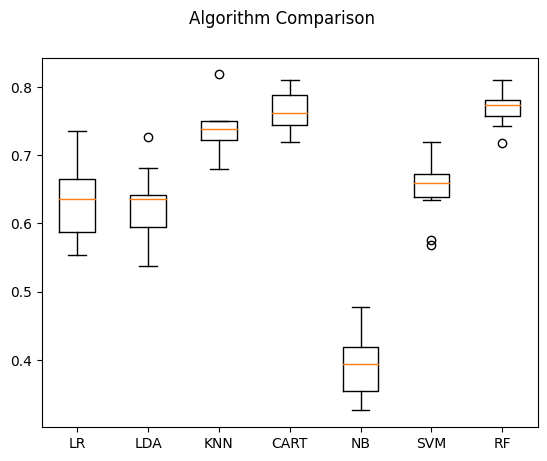

In [19]:
results = []
names = []
scoring = 'accuracy'
for name, model in models:
 kfold = model_selection.KFold(n_splits=10, shuffle= True,random_state=seed)
 cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
 results.append(cv_results)
 names.append(name)
 msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
 print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [20]:
X_test

,Age range of patient,"Type of injury incurred, if any",Location or environment in which the incident ocurred,Reason for incident,Involvement of medication associated with fall risk,Severity of incident,Sex
682,10,9,10,10,0,1,1
1319,3,9,10,4,0,1,1
576,6,9,10,8,0,1,0
1637,2,9,0,8,0,1,0
331,3,9,0,3,0,1,0
...,...,...,...,...,...,...,...
816,7,7,10,10,1,1,0
1591,6,9,1,2,0,1,0
306,3,9,0,3,0,1,0
192,8,9,10,4,0,1,0


In [21]:
from sklearn.metrics import accuracy_score

rfmodel =RandomForestClassifier()
rfmodel.fit(X_train,Y_train)


y_pred = rfmodel.predict(X_test)

print('Accuracy:' ,accuracy_score(Y_test, y_pred)*100)


Accuracy: 74.24242424242425


In [22]:
rfmodel.predict([[10,9,10,10,0,1,1]])

c:\Users\16373\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

In [23]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.79      0.73       131
           1       0.88      1.00      0.94       118
           2       0.52      0.28      0.37        81

    accuracy                           0.74       330
   macro avg       0.70      0.69      0.68       330
weighted avg       0.71      0.74      0.72       330



Confusion matrix

 [[104   6  21]
 [  0 118   0]
 [ 48  10  23]]


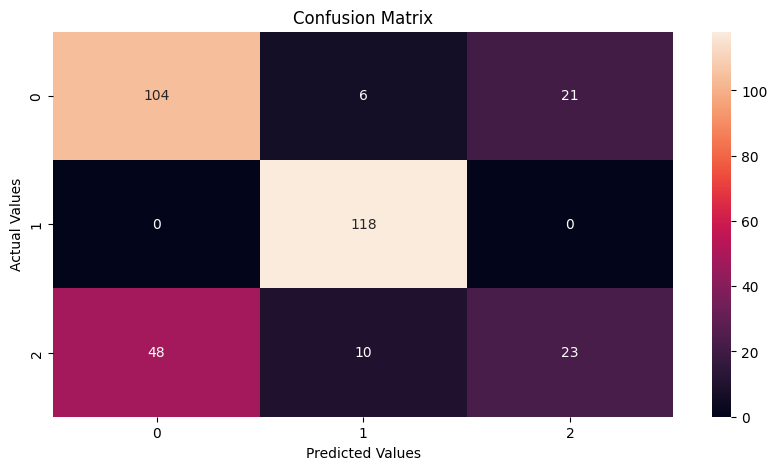

In [24]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, y_pred)

print('Confusion matrix\n\n', cm)

cm_df = pd.DataFrame(cm,
                     index = ['0','1','2'], 
                     columns = ['0','1','2'])
plt.figure(figsize=(10,5))
sns.heatmap(cm_df,annot=True,fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()


In [25]:
import pickle
pickle.dump(model,open("Rfmodel.pkl","wb"))